# Practical day 1 
## EASIM Armenia 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice D1.3. Optimization of a quadratic function: gradient method, Gauss-Newton method

We consider a symmetric positive definite ( $\operatorname{sdp)}$ matrix $A$ of size $n \times n$, and a vector $\mathbf{x}_{*} \in \mathbf{R}^{n}$. The objective function that is defined by

$$
J(\mathbf{x})=\frac{1}{2}\left\|A\left(\mathbf{x}-\mathbf{x}_{*}\right)\right\|^{2}
$$

attains its minimum value at the point $\mathbf{x}_{*}$. Therefore we know the 'exact' minimizer and we will be able to evaluate the performance of methods designed to find this minimizer.

a) Let $\mathbf{h} \in \mathbf{R}^{n}$. Compute the quantity

$$
D J(\mathbf{x}) \cdot \mathbf{h}
$$

What is the gradient of $J$ at the point $\mathbf{x}$ ?

b) One can prove that the Lipschitz constant of the gradient of $J$ is the largest eigenvalue $L$ of the matrix $A^{T} A$. Propose an implementation of the gradient descent method applied to $J$ with starting point 0.

c) Choose a $3 \times 3 \operatorname{sdp}$ matrix $A$. Implement 100 iterations of the gradient descent method. For each iterate $\mathbf{x}^{k}$ compute
- the distance to the true minimizer $\left\|\mathbf{x}^{k}-\mathbf{x}_{*}\right\|$,
- the value of the cost function $J\left(\mathbf{x}^{k}\right)$,

and plot these quantities vs $k$ in two different graphics. One can use a semi-log scale.

d) Choose the following $2 \times 2$ sdp matrix:

$$
A=\left(\begin{array}{ll}
4 & 2 \\
2 & 2
\end{array}\right)
$$

and perform the same study. Plot in the plane the iterates $\mathbf{x}^{k}$ together with the level curves of the function $J$ and the true minimizer $\mathbf{x}_{*}$.

We aim to minimize the same quadratic function using a Gauss-Newton method. One can note that

$$
J(\mathbf{x})=\frac{1}{2}\|F(\mathbf{x})\|^{2}, \quad \text { with } \quad F(\mathbf{x})=A\left(\mathbf{x}-\mathbf{x}_{*}\right)
$$

e) What is the Jacobian matrix $D F$ of $F$ ? Propose an implementation of the Gauss-Newton descent method applied to $J$.

f) Perform the same studies as questions c) and d) above.

Exercice D1.4. Optimization of a non linear function (Rosenbrock function): gradient method, GN method.

We consider the Rosenbrock function in dimension 2, defined by

$$
j(x, y)=(x-1)^{2}+100\left(y-x^{2}\right)^{2}
$$

The minimizer is the point $\mathbf{x}^{*}=\left(x^{*}, y^{*}\right)=(1,1)$, it is located at the bottom of a valley in the shape of a parabola. This function (and higher dimensional generalizations) is an example of a 'difficult' function to minimize.

[[4 2]
 [2 2]]


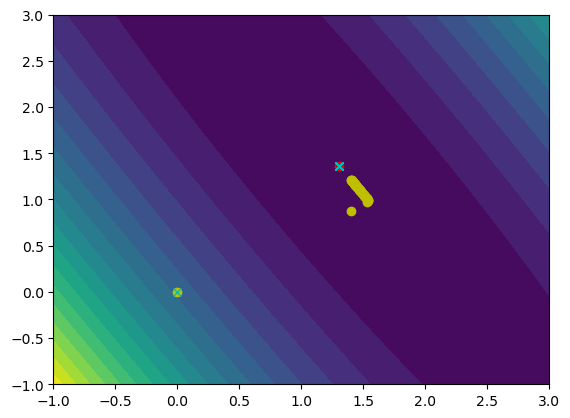

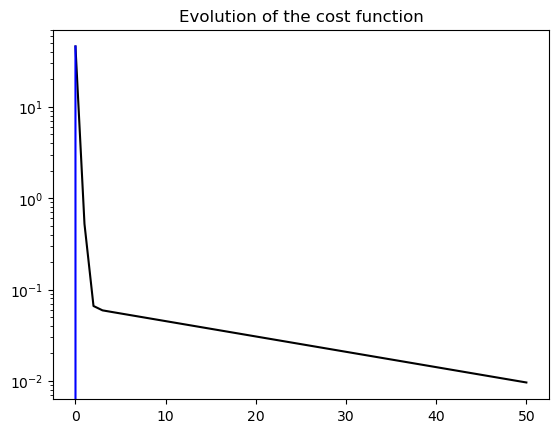

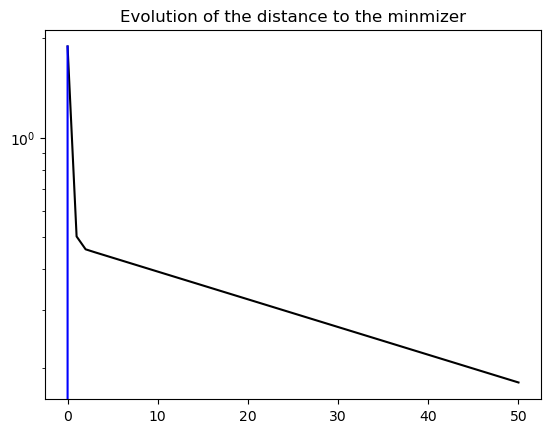

In [2]:
A = np.array([[4,2],[2,2]])
print(A)
ATA = np.dot(A.transpose(),A)

u, s, v = np.linalg.svd(ATA)
smax = np.max(s)
# Lipschitz constant of the gradient
L = smax

# true minimizer
x0 = 1+np.random.rand(2)
# the function J is J(x)=(x-x0)^T A (x-x0)

### level set of A
xx0, xx1 = np.meshgrid(np.linspace(-1,3),np.linspace(-1,3))


J=0.5*((xx0-x0[0])**2*ATA[0,0]+(xx1-x0[1])**2*ATA[1,1]+2*(xx0-x0[0])*(xx1-x0[1])*ATA[1,0])
plt.figure(1)
plt.contourf(xx0,xx1,J,levels=20)
plt.plot(x0[0],x0[1],'ro')


#### gradient descent : nbit iterations
nbit = 50
xk=np.array([0,0])
plt.plot(xk[0],xk[1],'yo')
J0 = 0.5*((xk[0]-x0[0])**2*ATA[0,0]+(xk[1]-x0[1])**2*ATA[1,1]+2*(xk[0]-x0[0])*(xk[1]-x0[1])*ATA[1,0])
Jlist = [J0]
distlist = [np.linalg.norm(xk-x0)]


for k in range(nbit):
    dk = ##-?-##
    tk = 0.9 / L
    xk = xk + tk * dk
    plt.plot(xk[0],xk[1],'yo')
    Jk = 0.5*((xk[0]-x0[0])**2*ATA[0,0]+(xk[1]-x0[1])**2*ATA[1,1]+2*(xk[0]-x0[0])*(xk[1]-x0[1])*ATA[1,0])
    Jlist.append(Jk)
    distk = np.linalg.norm(xk-x0)
    distlist.append(distk)
    
    
plt.figure(2)
plt.semilogy(Jlist,'k',label='gradient descent')
plt.title('Evolution of the cost function')

plt.figure(3)
plt.semilogy(distlist,'k',label='gradient descent');
plt.title('Evolution of the distance to the minmizer');

#
##### Gauss-Newton descent : nbit iterations
nbit = 10
xk=np.array([0,0])
plt.figure(1)
plt.plot(xk[0],xk[1],'cx')
J0 = 0.5*((xk[0]-x0[0])**2*ATA[0,0]+(xk[1]-x0[1])**2*ATA[1,1]+2*(xk[0]-x0[0])*(xk[1]-x0[1])*ATA[1,0])
Jlist = [J0]
distlist = [np.linalg.norm(xk-x0)]


for k in range(nbit):
    F = np.dot(A,xk-x0)
    rhs = ##-?-##
    dk = np.linalg.solve(##-?-##)
    xk = xk +  dk
    plt.plot(xk[0],xk[1],'cx')
    Jk = 0.5*((xk[0]-x0[0])**2*ATA[0,0]+(xk[1]-x0[1])**2*ATA[1,1]+2*(xk[0]-x0[0])*(xk[1]-x0[1])*ATA[1,0])
    Jlist.append(Jk)
    distk = np.linalg.norm(xk-x0)
    distlist.append(distk)
    
    
plt.figure(2)
plt.semilogy(Jlist,'b',label='GN descent')
plt.title('Evolution of the cost function');

plt.figure(3)
plt.semilogy(distlist,'b',label='GN descent')
plt.title('Evolution of the distance to the minmizer');